### Global Temperature Analysis project
- This project aims to:
    - combine basic Calculus skills (differentiation/finding rates of change), and data analysis skills
    and visualization (matplotlib, pandas)
    - apply these skills in a real-world data, to show the relation between calculus and real-world problems

### Step 1: data source and extraction
- The data is from NASA, here's the link: https://climate.nasa.gov/vital-signs/global-temperature/?intent=121
 we'll begin by importing the necessary libraries
   

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

- we begin by extracting the data and building the pandas dataframe, i downloaded the .txt file so i'll just have to put the path of the file

In [32]:
df = pd.read_csv('D:/graph.txt', delim_whitespace=True)
df.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_16960\1999157172.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('D:/graph.txt', delim_whitespace=True)


,Land-Ocean,Temperature,Index,(C)
0,--------------------------------,NaN,NaN,NaN
1,Year,No_Smoothing,Lowess(5),NaN
2,----------------------------,NaN,NaN,NaN
3,1880,-0.17,-0.09,NaN
4,1881,-0.09,-0.13,NaN


actually we don't want the first 2 rows, the actual keys of the data frame should be (Year, No_Smoothing, and Lowess(5)), so we use the skiprows attribute in building the dataframe
and also we want to drop the NaN values as they don't affect the data we have.

In [35]:
df = pd.read_csv('D:/graph.txt', delim_whitespace=True, skiprows=2)
df = df.dropna(axis=0, how='any')
df.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_16960\2985615516.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('D:/graph.txt', delim_whitespace=True, skiprows=2)


,Year,No_Smoothing,Lowess(5)
1,1880,-0.17,-0.09
2,1881,-0.09,-0.13
3,1882,-0.11,-0.17
4,1883,-0.17,-0.20
5,1884,-0.28,-0.24


- now to explain the attributes of the dataframe:
    - Year: the year for which the temperature will be provided
    - No_Smoothing: the actual temperature with any noisiness or variance happened in the year, that's why it'll be spiky in the visualization it'll appear like a noisy signal.
    - Lowess(5): is a type of smoothing to the data that removes the noisiness and draws a smoothed line that shows the trend of the data clearly.

### Step 2: calculating rates of change
- now we'll put columns in the data frame that will store the rates of change for the temperatures over the years: we'll calculate it for both unsmoothed and smoothed temperature.

In [36]:
df['rate_of_change_No_Smoothing'] = np.gradient(df['No_Smoothing'], 1)
df['rate_of_change_lowess'] = np.gradient(df['Lowess(5)'], 1)
df.head()

,Year,No_Smoothing,Lowess(5),rate_of_change_No_Smoothing,rate_of_change_lowess
1,1880,-0.17,-0.09,0.080,-0.040
2,1881,-0.09,-0.13,0.030,-0.040
3,1882,-0.11,-0.17,-0.040,-0.035
4,1883,-0.17,-0.20,-0.085,-0.035
5,1884,-0.28,-0.24,-0.080,-0.030


- conisder the (rate_of_change_No_Smoothing) column:
    - in 1880 the unsmoothed temperature was -0.17 and in 1881 it became -0.09, so the temperature increased, so the change should be positive and the value of this change with respect to the rest of the temperatures is: 0.08 as shown in the first row of (rate_of_change_No_Smoothing) column
    - in 1882 the temperature was -0.11 and in 1883 it became -0.17, so the temperature decreased, so the rate of change should be negative and the value of this change with respect to the rest of the temperatures is: -0.04 as shown in the 3rd row in (rate_of_change_No_Smoothing) column
- what np.gradient(data, spacing) does is calculating an average rate of change
by dividing: (f(x+spacing)-f(x-spacing))/2*spacing. in other words: change in y/ change in x

### Step 3: Plotting

Text(0, 0.5, 'Temperature anomaly in (°C)')

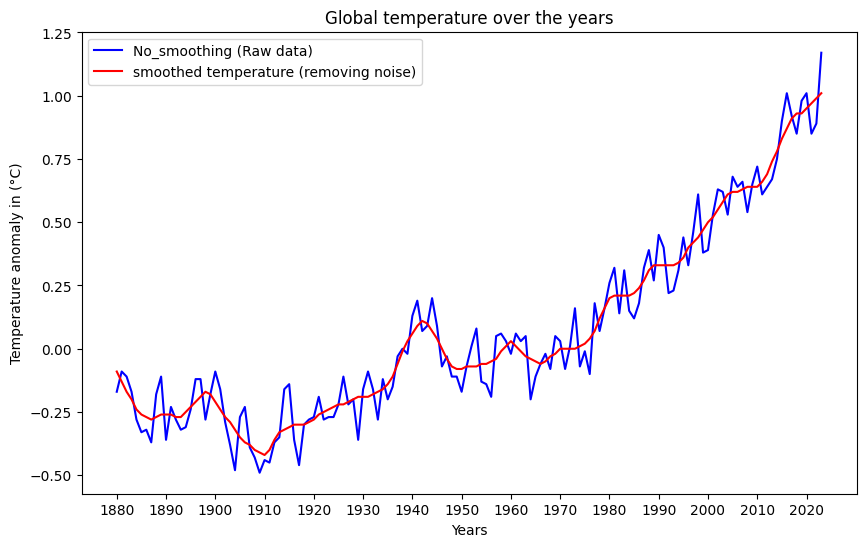

In [5]:
plt.figure(figsize=(10,6))
plt.title("Global temperature over the years")
plt.plot(df['Year'], df['No_Smoothing'], label='No_smoothing (Raw data)', color='blue')
plt.plot(df['Year'], df['Lowess(5)'], label='smoothed temperature (removing noise)', color='red')
plt.legend()
plt.xticks([i for i in range(0, len(df['Year']), 10)])
plt.xlabel('Years')
plt.ylabel('Temperature anomaly in (°C)')

- As we see here, the raw data is forming spikes everywhere, because of the noisiness of the data.
this noisiness is due to short-term variability in global temperature due to natural climate processes like volcanic eruptions, earthquakes, etc.
- on the other hand, the smoothed data shows clearly the trend/increasing and decreasing intervals in the temperature over the years, we clearly see that the temperature was decreasing until 1910, then started to increase.
the increase in the temperature is due to the industrial revolution, by the rapid burning of fossil fuels (coal, oil, gases) this led to greenhouse gases (co2, ch4, n2o, water vapor) which trap heat in the atmosphere.
- what is the rate of this increase? knowing the rate of the change will make us know or predict by how much the temperature will increase in the coming years, and will let us know if we're making progress or is things getting much worse, because if the rate of change increased that will tell us that the temperature is increasing and accelerating as well with a high acceleration which will lead to high temperatures.
- now to plot the rates of change in another graph.

Text(0, 0.5, 'Temperature anomaly in (°C)')

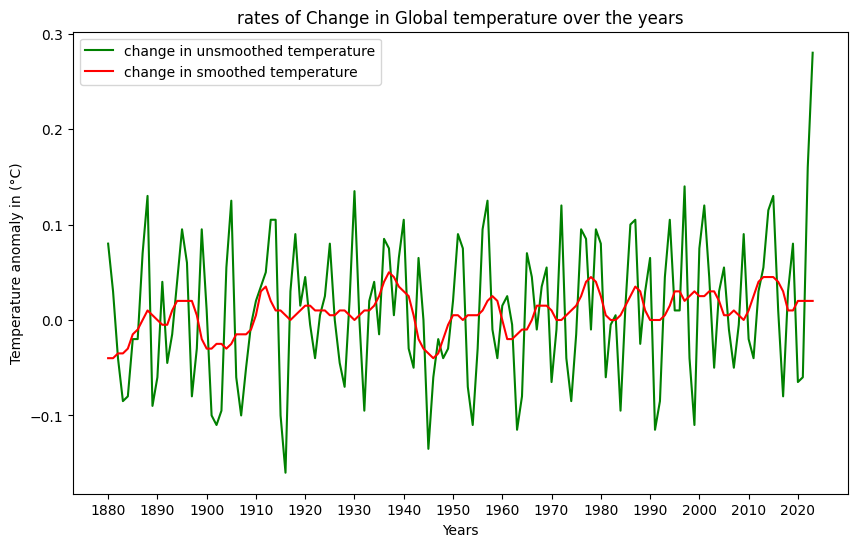

In [38]:
plt.figure(figsize=(10,6))
plt.title("rates of Change in Global temperature over the years")
plt.plot(df['Year'], df['rate_of_change_No_Smoothing'], label='change in unsmoothed temperature', color='green')
plt.plot(df['Year'], df['rate_of_change_lowess'], label='change in smoothed temperature', color='red')
plt.legend()
plt.xticks([i for i in range(0, len(df['Year']), 10)])
plt.xlabel('Years')
plt.ylabel('Temperature anomaly in (°C)')

- As we see here the rates of change in the unsmoothed temperature are spikes and show large fluctuations from year to year, which is due to the short-term climate processes like volcanic eruptions and other atmospheric circulation patterns. These fluctuations are significant but they don't capture long-term trends.
- the smoothed trend (the red line) from 1880 to 1940 was facing a little increase in temperature, the rate of the increase and decrease wasn't too serious, the maximum value it reached is less than 0.1 celsius, then starting from mid 1940s we're noticing an increasing trend, there's no big fluctuations in this period and the decrease in rate that happens is still bigger than the rate it reached in the mid 1940s, but it still increases.
- we can try to calculate the average change in the period from 1940 to 2023 and from 1880 to 1940 to compare between them.

In [18]:
avg_change_before_1940 = df['rate_of_change_lowess'].iloc[0:60].mean()
avg_change_after_1940 = df['rate_of_change_lowess'].iloc[60:144].mean()
print(avg_change_before_1940, avg_change_after_1940)

avg_change_before_1910 = df['rate_of_change_lowess'].iloc[:1910-1880].mean()
avg_change_between_1910_1950 = df['rate_of_change_lowess'].iloc[1910-1880:1950-1880].mean()
print(avg_change_before_1910, avg_change_between_1910_1950)

0.0019166666666666666 0.011607142857142858
-0.011500000000000003 0.008374999999999999


- There's a lot of key points here, let's start one by one:
    - first off, we calculated the average of the change before 1940 and after 1940, we found out that the average before 1940 was 0.001, and the average after it is 0.01, which is clearly a difference, this shows that the rate of change have increased, so not only are the temperatures increasing, they're doing it with an acceleration/increase in rate of increasing, which will make things much worse
    - okay what about before 1910, we can see from the graph that it was increasing a little then a big fluctuation/decrease in the rate happened, we calculated the average there it was -0.011, which tells that this period has more negative rates than usual, on the other hand between 1910 and 1950 we find that it is 0.008, which tells us again that the rate have increased
    - this just shows that the increase in the rate began from 1910, since then the rate was rapidly increasing, leading to an increase in temperature and every decade the temperature increases by a higher rate.
    - so what exactly happened in 1910? we know that there was industrial revolution already, but starting from late 19th century up to early 20th century, industrialization led to a massive increase in the burning of fossil fuels like coal, oil, and natural gas. This was particularly driven by the expansion of factories, transportation (cars, trains, ships), and electricity production.

### step 4: final comparison & conclusion
- we'll now plot the two graphs: smoothed temperature and its derivative, to have a better look at the effect of the rate of change

Text(0, 0.5, 'Temperature anomaly in (°C)')

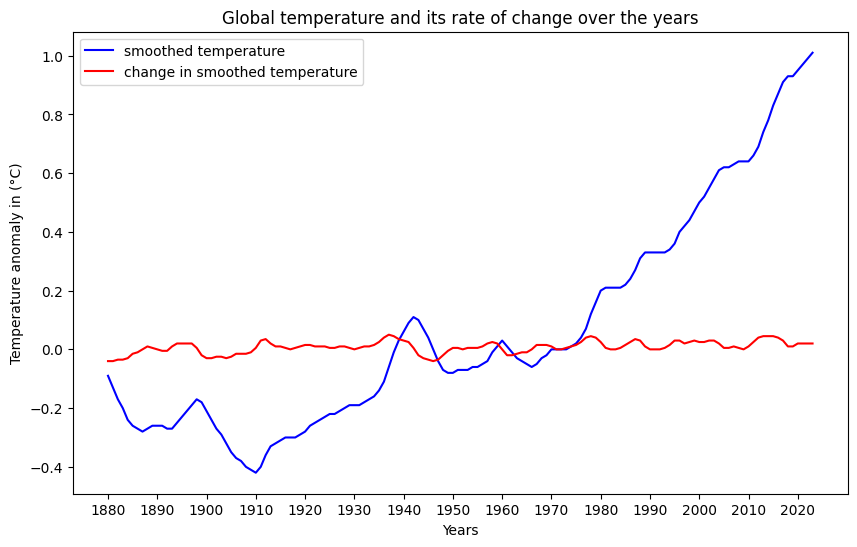

In [39]:
plt.figure(figsize=(10,6))
plt.title("Global temperature and its rate of change over the years")
plt.plot(df['Year'], df['Lowess(5)'], label='smoothed temperature', color='blue')
plt.plot(df['Year'], df['rate_of_change_lowess'], label='change in smoothed temperature', color='red')
plt.legend()
plt.xticks([i for i in range(0, len(df['Year']), 10)])
plt.xlabel('Years')
plt.ylabel('Temperature anomaly in (°C)')

In [31]:
avg_change_between_1950_1970 = df['rate_of_change_lowess'].iloc[1950-1880:1970-1880].mean()
avg_change_between_1970_2000 = df['rate_of_change_lowess'].iloc[1970-1880:2000-1880].mean()
avg_change_after_2000 = df['rate_of_change_lowess'].iloc[2000-1880:].mean()
print(avg_change_between_1910_1950, avg_change_between_1950_1970, avg_change_between_1970_2000, avg_change_after_2000)

0.008374999999999999 0.0034999999999999996 0.016500000000000004 0.022291666666666668


- As we see from the graph, the temperature was decreasing until 1910, then started to increase, we want to know the rates of the increase, if the rates itself is increasing then that will lead to a problem, that will make things much worse, because not only will the temperatures increase but the amount of their increase will be higher each time.
- from 1910 to 1950: the average rate of the increase is approx. 0.0083
- from 1950 to 1970: the average rate decreased and became approx. 0.0034, which explains why the temperatures in this area were increasing but with a little rate compared to the period before it (1910:1950)
- from 1970 to 2000: we see a big increase in the average rate of change, it became approx. 0.016
- from 2000 and on: another increase in the rate, it became 0.022, which clearly explains why the temperature were increasing highly in the last decades.

### Conclusion
What we gained from this analysis: is how rates of change are important to understand graphs.
In first look at the data we saw that the temperatures were increasing, but we didn't know by how much, knowing the average rate of change over different periods will make us know how serious the situation is, if the rates of change are increasing, this is a bad sign, it means the temperature will keep on increasing with a high amount, if we managed over a period to decrease the rate of the change that will be considered a progress itself, because we managed to make the temperature increases by a lower amount which is good and means if we kept on that we'll be able to make the temperatures decrease over time.

well how does this helped us? we can check the periods which had a decrease in rate, and see what we did in these years and try to do the same to decrease the rate as well.
and we can try many methods to decrease the rates, and see which one decreased the rate and stick to it and develop it.

In the end that was a practice project to demonstrate how differentiation/rates of change are important and help us gain more insights from the data, and how calculus can help us in real-world problems, so it was a way to apply calculus' concept of differentiation in real-world data.